# **Crop Cultivation Cost Prediction**

In [ ]:
!pip install fuzzywuzzy python-Levenshtein

# **Importing Libraries**
#### Importing necessary packages to work on this project

In [55]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from fuzzywuzzy import process
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import pickle

# **Mounting Drive and loading the file**
#### Uploading the dataset using google colab drive to work on the preprocessing dataset

In [56]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Uploading the dataset

In [57]:
upload = pd.read_csv('final_data.csv')
upload["Crop"] = upload["Crop"].str.strip()

## **Data Preprocessing**
#### This process is to checking the values in dataset, removing the null values present and aggragating the values by each year using pivot technique

In [58]:
# fair_data = df.copy()
pivot = upload.pivot_table(index=["Year","State","Crop Area(Ha)","Crop"],values="Cultivation Cost",aggfunc=np.mean)

In [59]:
final = pd.DataFrame(pivot)
df = final.reset_index()

In [60]:
df.isnull().sum()

Year                0
State               0
Crop Area(Ha)       0
Crop                0
Cultivation Cost    0
dtype: int64

In [61]:
df

,Year,State,Crop Area(Ha),Crop,Cultivation Cost
0,2000,Andhra Pradesh,1,Arhar,25928.141290
1,2000,Andhra Pradesh,1,Cotton,37066.379316
2,2000,Andhra Pradesh,1,Gram,13718.758719
3,2000,Andhra Pradesh,1,Greengram,31393.594656
4,2000,Andhra Pradesh,1,Groundnut,31444.367498
...,...,...,...,...,...
3373,2018,West Bengal,1,Paddy,77606.840000
3374,2018,West Bengal,1,Potato,147423.400000
3375,2018,West Bengal,1,Rapeseed,49368.620000
3376,2018,West Bengal,1,Sesamum,48544.220000


# **Getting inputs from the user**
#### This projects aims to find the cultivation cost value of the specific crops based on the historical trends of cultivation cost recorded, This model will require the inputs like location, area, crop,year and season which the crop is going to cultivated

In [12]:
stat = str(input("Enter the State : ")).capitalize()
Area = float(input("Enter the Area :"))
crop = str(input("Enter the Crop : ")).capitalize()
Year = int(input("Enter the Year :"))

State = process.extract(stat,df['State'],limit=1)[0][0]
Crop = process.extract(crop,(df.loc[df['State']== State]).Crop,limit=1)[0][0]

State,Crop

Enter the State : andhra pradesh
Enter the Area :123
Enter the Crop : cotton
Enter the Year :2000


('Andhra Pradesh', 'Cotton')

In [13]:
df1 = df[["State","Crop","Year","Cultivation Cost"]]
filter_df = df.loc[(df["State"]==State) & (df["Crop"]==Crop)]
df2 = filter_df[["State","Crop","Year","Cultivation Cost"]]

## Printing the dataset after initial data preprocessing completed

In [14]:
df1

,State,Crop,Year,Cultivation Cost
0,Andhra Pradesh,Arhar,2000,25928.141290
1,Andhra Pradesh,Cotton,2000,37066.379316
2,Andhra Pradesh,Gram,2000,13718.758719
3,Andhra Pradesh,Greengram,2000,31393.594656
4,Andhra Pradesh,Groundnut,2000,31444.367498
...,...,...,...,...
3373,West Bengal,Paddy,2018,77606.840000
3374,West Bengal,Potato,2018,147423.400000
3375,West Bengal,Rapeseed,2018,49368.620000
3376,West Bengal,Sesamum,2018,48544.220000


# **Plotting the dataset to check its trends**
#### This plot is to find the highest cultivation costs of crops taken for this project

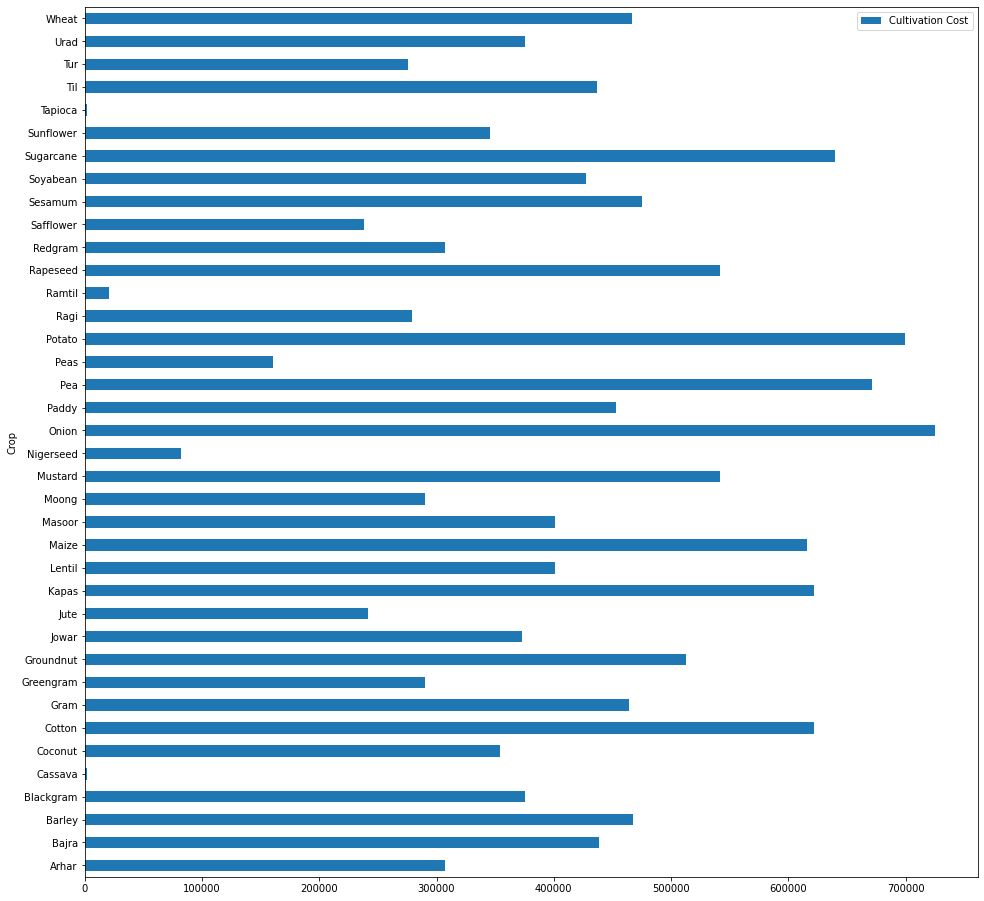

In [62]:
plot1 = df.groupby(df["Crop"])["Cultivation Cost"].max()
plot1.plot(kind="barh",figsize=(16,16),legend=True)

#### This plot will displays the cultivation cost of user selected region and crop choosen

In [16]:
df2
plot2 = df2.set_index("Year")

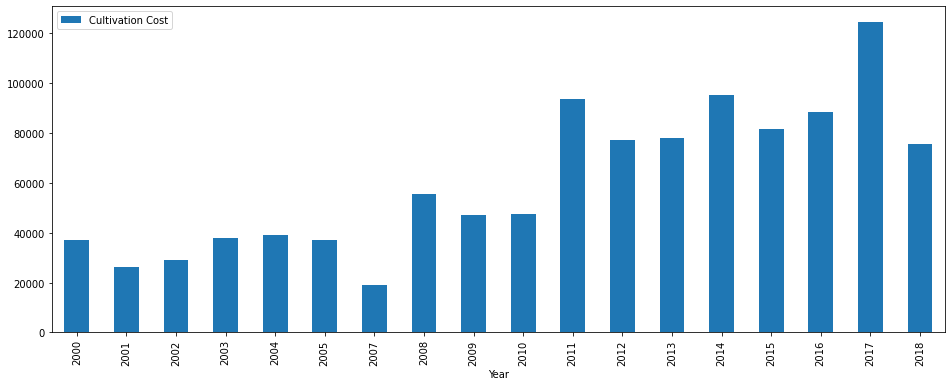

In [17]:
plot2.plot(kind="bar",figsize=(16,6),legend=True)

#### This bar plot shows the maximum cultivation cost evolved every year

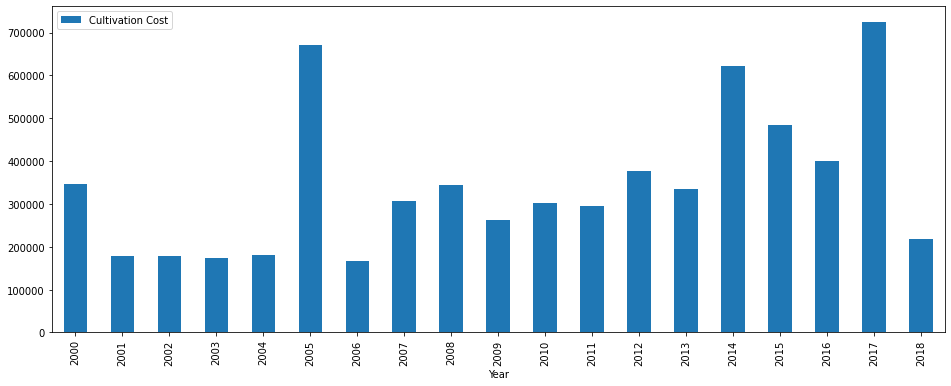

In [18]:
plot3 = df.groupby(df["Year"])["Cultivation Cost"].max()
plot3.plot(kind="bar",figsize=(16,6),legend=True)

#### This plot shows the evolution of cultivation cost each year with all the region of dataset

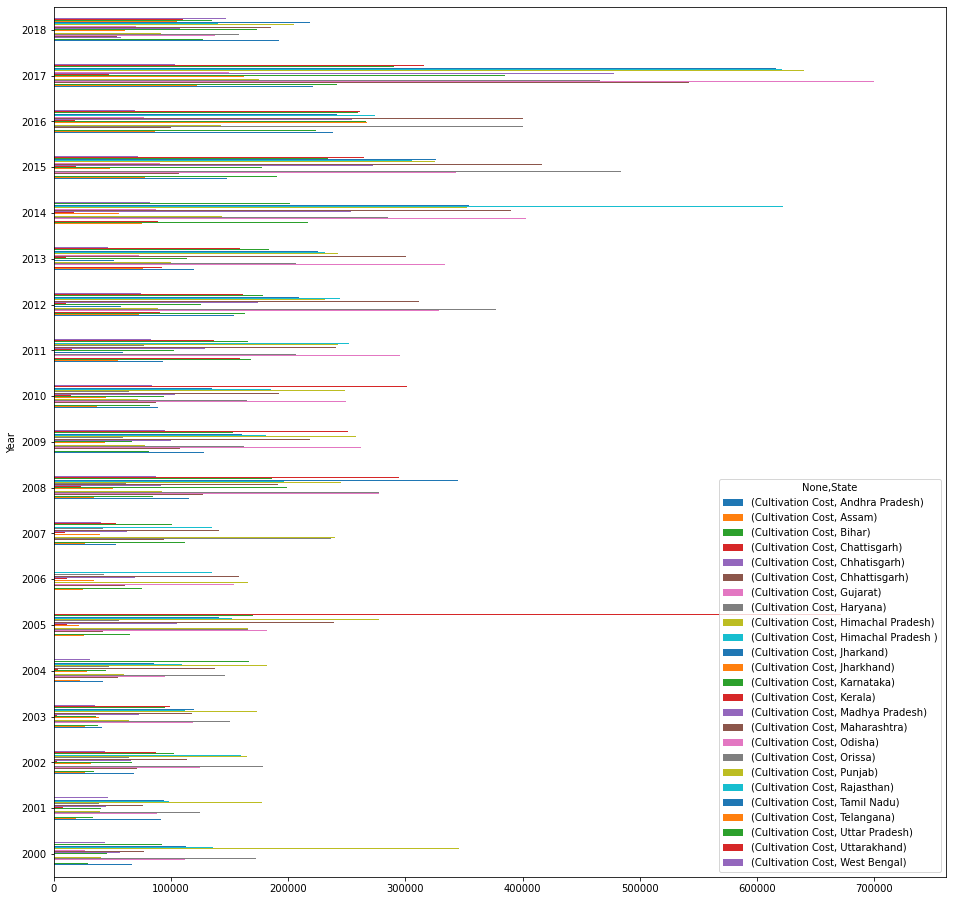

In [19]:
plot4 = df1.pivot_table(df1,index ="Year",columns = "State",aggfunc = np.max)
plot4.plot(kind="barh",figsize=(16,16),legend=True)

# **Data Preprocessing**
#### This step is to convert the categorical data values into numerical value using specific mapping function

In [20]:
df

,Year,State,Crop Area(Ha),Crop,Cultivation Cost
0,2000,Andhra Pradesh,1,Arhar,25928.141290
1,2000,Andhra Pradesh,1,Cotton,37066.379316
2,2000,Andhra Pradesh,1,Gram,13718.758719
3,2000,Andhra Pradesh,1,Greengram,31393.594656
4,2000,Andhra Pradesh,1,Groundnut,31444.367498
...,...,...,...,...,...
3373,2018,West Bengal,1,Paddy,77606.840000
3374,2018,West Bengal,1,Potato,147423.400000
3375,2018,West Bengal,1,Rapeseed,49368.620000
3376,2018,West Bengal,1,Sesamum,48544.220000


In [21]:
s = df['State'].value_counts()

In [22]:
s

Maharashtra          319
Madhya Pradesh       313
Rajasthan            275
Uttar Pradesh        272
Andhra Pradesh       272
Karnataka            252
Gujarat              228
Tamil Nadu           196
Bihar                177
Haryana              143
Orissa               136
West Bengal          133
Chhattisgarh          98
Odisha                90
Punjab                86
Assam                 80
Jharkhand             77
Uttarakhand           76
Himachal Pradesh      68
Kerala                37
Chattisgarh           25
Telangana             12
Jharkand               6
Himachal Pradesh       4
Chhatisgarh            3
Name: State, dtype: int64

In [23]:
s.index

Index(['Maharashtra', 'Madhya Pradesh', 'Rajasthan', 'Uttar Pradesh',
       'Andhra Pradesh', 'Karnataka', 'Gujarat', 'Tamil Nadu', 'Bihar',
       'Haryana', 'Orissa', 'West Bengal', 'Chhattisgarh', 'Odisha', 'Punjab',
       'Assam', 'Jharkhand', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Chattisgarh', 'Telangana', 'Jharkand', 'Himachal Pradesh ',
       'Chhatisgarh'],
      dtype='object')

#### Making the string format columns into numerical columns using for loop statement by making the each string value index as its native numerical value

In [24]:
State_map = {}
item_list = s.index
for i in range(0,len(item_list)):
    State_map[item_list[i]] = i
df['State'] = df['State'].map(lambda m:State_map[m])
State_map

{'Andhra Pradesh': 4,
 'Assam': 15,
 'Bihar': 8,
 'Chattisgarh': 20,
 'Chhatisgarh': 24,
 'Chhattisgarh': 12,
 'Gujarat': 6,
 'Haryana': 9,
 'Himachal Pradesh': 18,
 'Himachal Pradesh ': 23,
 'Jharkand': 22,
 'Jharkhand': 16,
 'Karnataka': 5,
 'Kerala': 19,
 'Madhya Pradesh': 1,
 'Maharashtra': 0,
 'Odisha': 13,
 'Orissa': 10,
 'Punjab': 14,
 'Rajasthan': 2,
 'Tamil Nadu': 7,
 'Telangana': 21,
 'Uttar Pradesh': 3,
 'Uttarakhand': 17,
 'West Bengal': 11}

In [25]:
c = df['Crop'].value_counts()
Crop_map = {}
item_list = c.index
for i in range(0,len(item_list)):
    Crop_map[item_list[i]] = i
df['Crop'] = df['Crop'].map(lambda c:Crop_map[c])
Crop_map

{'Arhar': 7,
 'Bajra': 15,
 'Barley': 25,
 'Blackgram': 27,
 'Cassava': 35,
 'Coconut': 32,
 'Cotton': 4,
 'Gram': 2,
 'Greengram': 19,
 'Groundnut': 12,
 'Jowar': 13,
 'Jute': 22,
 'Kapas': 28,
 'Lentil': 17,
 'Maize': 3,
 'Masoor': 20,
 'Moong': 14,
 'Mustard': 8,
 'Nigerseed': 26,
 'Onion': 23,
 'Paddy': 0,
 'Pea': 33,
 'Peas': 36,
 'Potato': 16,
 'Ragi': 21,
 'Ramtil': 37,
 'Rapeseed': 5,
 'Redgram': 9,
 'Safflower': 30,
 'Sesamum': 11,
 'Soyabean': 18,
 'Sugarcane': 10,
 'Sunflower': 24,
 'Tapioca': 34,
 'Til': 31,
 'Tur': 29,
 'Urad': 6,
 'Wheat': 1}

#### Displaying the converted categorical values

In [63]:
df

,Year,State,Crop Area(Ha),Crop,Cultivation Cost
0,2000,Andhra Pradesh,1,Arhar,25928.141290
1,2000,Andhra Pradesh,1,Cotton,37066.379316
2,2000,Andhra Pradesh,1,Gram,13718.758719
3,2000,Andhra Pradesh,1,Greengram,31393.594656
4,2000,Andhra Pradesh,1,Groundnut,31444.367498
...,...,...,...,...,...
3373,2018,West Bengal,1,Paddy,77606.840000
3374,2018,West Bengal,1,Potato,147423.400000
3375,2018,West Bengal,1,Rapeseed,49368.620000
3376,2018,West Bengal,1,Sesamum,48544.220000


# **Feature Selection Process**
#### Before training the model we need to choose the correct features required and removing the irrelevant columns to exclude the congested data. Here mean absolute difference and correlation plot is calculated for choosing the features


In [64]:
x = df[['State','Year','Crop','Crop Area(Ha)']]
y = df['Cultivation Cost']

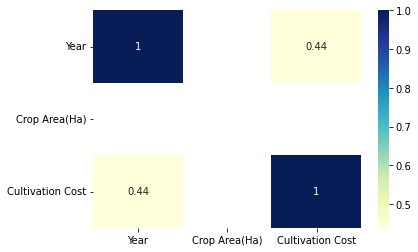

In [65]:
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<BarContainer object of 4 artists>

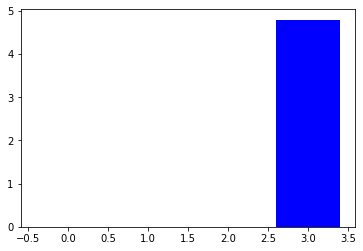

In [66]:
mean_abs_diff = np.sum(np.abs(x-np.mean(x,axis=0)),axis=0)/x.shape[0]
plt.bar(np.arange(x.shape[1]),mean_abs_diff,color="blue")

# **Splitting the dataset into X and Y**
#### Splitting the dependent and independant values in the dataset to make them to split into train and test datasets using train_test_split method.

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

# **Developing Linear Regression model**
#### This steps involves in the process of building the linear regression model and it is trained with train dataset also tested with test dataset in order to see the differentiation between actual and predicted values.

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [69]:
LR_prediction = LR_model.predict(x_test)

In [37]:
LR_Accuracy = r2_score(y_test,LR_prediction)*100

In [38]:
LRP = pd.DataFrame({'Actual': y_test, 'Predicted': LR_prediction})

In [39]:
LRP['Predicted'] = LRP['Predicted'].astype(int)
LRP

,Actual,Predicted
2701,271365.053117,135156
689,57125.031659,59273
1033,43263.627476,75019
814,37019.126469,76714
2115,69294.649889,126220
...,...,...
3105,186258.173575,158988
520,38099.635362,23682
501,19220.135455,38531
2149,119254.939229,129352


#### Finding the accuracy and error metrics of the linear regression model

In [40]:
print('r2 Score is ==',r2_score(y_test,LR_prediction))
print('mean_sqrd_error is ==',mean_squared_error(y_test,LR_prediction))
print('root_mean_squared error of is ==',np.sqrt(mean_squared_error(y_test,LR_prediction)))
print('mean absolute error of is ==',mean_absolute_error(y_test,LR_prediction))

r2 Score is == 0.19066412175717917
mean_sqrd_error is == 7127079118.712425
root_mean_squared error of is == 84422.02981871749
mean absolute error of is == 54356.812226446964


# **Random Forest Regression Model**
#### Developing the random forest regression model and training it with the train dataset. After the completion of training then the model will be tested with test dataset in order to find the diffrence betwwen actual and predicted values.

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
RF_prediction = RF_model.predict(x_test)
RF_Accuracy = r2_score(y_test,RF_prediction)*100

In [44]:
RFP = pd.DataFrame({'Actual': y_test, 'Predicted': RF_prediction})
RFP['Predicted'] = RFP['Predicted'].astype(int)
RFP

,Actual,Predicted
2701,271365.053117,249330
689,57125.031659,44587
1033,43263.627476,88083
814,37019.126469,27897
2115,69294.649889,96911
...,...,...
3105,186258.173575,326531
520,38099.635362,47962
501,19220.135455,46648
2149,119254.939229,122307


#### Finding the accuracy and error metrics of the random forest regression model

In [45]:
print('r2 Score is ==',r2_score(y_test,RF_prediction))
print('mean_sqrd_error is ==',mean_squared_error(y_test,RF_prediction))
print('root_mean_squared error of is ==',np.sqrt(mean_squared_error(y_test,RF_prediction)))
print('mean absolute error of is ==',mean_absolute_error(y_test,RF_prediction))

r2 Score is == 0.7109216830341343
mean_sqrd_error is == 2545647724.1477447
root_mean_squared error of is == 50454.41233576846
mean absolute error of is == 24855.119916562246


# **Developing the XGB Regression model**
#### Creating XG Boost regression model for analysing its accuracy to compare the performances of the models

In [46]:
from xgboost import XGBRegressor

In [47]:
XGB_model = XGBRegressor(booster='gbtree', eta=0.5, subsample=0.7, colsample_bytree=0.7,objective="reg:squarederror",
                max_depth = 10)
XGB_model.fit(x_train,y_train)

XGBRegressor(colsample_bytree=0.7, eta=0.5, max_depth=10,
             objective='reg:squarederror', subsample=0.7)

In [48]:
XGB_prediction = XGB_model.predict(x_test)
XGB_Accuracy = r2_score(y_test,XGB_prediction)*100

In [49]:
XGB = pd.DataFrame({'Actual': y_test, 'Predicted': XGB_prediction})
XGB['Predicted'] = XGB['Predicted'].astype(int)
XGB

,Actual,Predicted
2701,271365.053117,226723
689,57125.031659,59606
1033,43263.627476,54395
814,37019.126469,24334
2115,69294.649889,87954
...,...,...
3105,186258.173575,231036
520,38099.635362,29384
501,19220.135455,25214
2149,119254.939229,135540


#### Finding the accuracy and error metrics of the XGBoost model

In [50]:
print('r2 Score is ==',r2_score(y_test,XGB_prediction))
print('mean_sqrd_error is ==',mean_squared_error(y_test,XGB_prediction))
print('root_mean_squared error of is ==',np.sqrt(mean_squared_error(y_test,XGB_prediction)))
print('mean absolute error of is ==',mean_absolute_error(y_test,XGB_prediction))

r2 Score is == 0.7344961398546627
mean_sqrd_error is == 2338049094.879803
root_mean_squared error of is == 48353.37728514735
mean absolute error of is == 26471.324152922138


# **Comparing the Accuracy of each models**
#### Comparing the accuracy result of all three models, it is plotted with bar chart to view the accuracy values and deciding the ultimate regression model to utilize it for this project.

Accuracy of Linear Regression model :  19.07
Accuracy of Random Forest Regression model :  71.09
Accuracy of XGBoost Regression model :  73.45


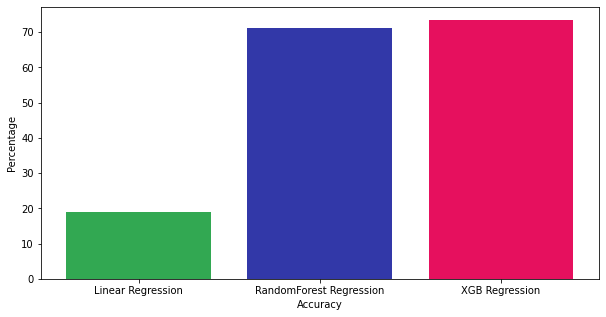

In [70]:
result = [LR_Accuracy,RF_Accuracy,XGB_Accuracy]
height = result
bar = ['Linear Regression','RandomForest Regression','XGB Regression']
x_pos = np.arange(len(bar))
plt.figure(figsize=(10,5))
plt.bar(x_pos, height, color=['#32a852', '#3238a8','#e6105e'])
plt.xticks(x_pos, bar)
plt.xticks(rotation=0)
plt.xlabel('Accuracy')
plt.ylabel('Percentage')

print("Accuracy of Linear Regression model : ",round(LR_Accuracy,2))
print("Accuracy of Random Forest Regression model : ",round(RF_Accuracy,2))
print("Accuracy of XGBoost Regression model : ",round(XGB_Accuracy,2))

# **Predicting with manual input**
#### We are predicitng the model using user input values by converting into numerical values from standard values set to the locations. We are predicting to check the result of each model developed to see its performance.

In [52]:
n1 = State_map.get(State)
n2 = Year
n3 = Crop_map.get(Crop)
n4 = Area
input_1 = [[n1,n2,n3,n4]]

In [53]:
input_2 = {"State" :[n1],"Year":[n2],"Crop":[n3],"Crop Area(Ha)":[n4]}
input_2 = pd.DataFrame(input_2)

In [ ]:
Prediction1 = LR_model.predict(input_1)
Prediction2 = RF_model.predict(input_1)
Prediction3 = XGB_model.predict(input_2)

# **Saving the best model**
#### Saving the best performing model into pickle file to wrap the model to predicting tool. And testing the wrapped model file with manual input in order to check its predictablity accuracy.

In [ ]:
import pickle
pickle.dump(RF_model,open("/content/drive/My Drive/Dataset/Cultcost_RFModel.sav","wb"))

In [ ]:
rf = pickle.load(open("/content/drive/My Drive/Dataset/Cultcost_RFModel.sav","rb"))

In [ ]:
inp = input_1

In [ ]:
rf.predict(inp)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([50446.477])